In [1]:
import pickle as pckl
import seaborn as sb
import pandas as pd
from datetime import datetime
import numpy as np

import seaborn as sb
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter

import windowing_function_vader

In [126]:
df = pckl.load(open('ARK_14day_window_df.pckl','rb'))

In [3]:
params = {'game': 'ARK',
          'window_days': 7,
          'save_df': True,
          'shift': 1}

In [127]:
df.head()

,time_of_review,reviews,upvoted,upvotes_window,total_window,percent_window,time_of_review_unix,minutes_played
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,0,1,1.0,1.433284e+09,4578
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1,1,1.0,1.433284e+09,28946
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,2,2,1.0,1.433284e+09,82165
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,3,3,1.0,1.433285e+09,664
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,4,4,1.0,1.433285e+09,43151


In [14]:
a = df['comp_sent_raw'].iloc[0:10].cumsum()
b = max(a)
print(type(a), a, type(b), b)

<class 'pandas.core.series.Series'> 0    0.5400
1    1.1876
2    1.9840
3    2.6873
4    3.6601
5    4.6048
6    4.5532
7    3.9976
8    4.7841
9    4.7841
Name: comp_sent_raw, dtype: float64 <class 'float'> 4.7841000000000005


In [31]:
import importlib
importlib.reload(windowing_function_vader)

<module 'windowing_function_vader' from '/Users/tylerblair/Documents/insight/windowing_function_vader.py'>

In [32]:
avg_sent_df = windowing_function_vader.window_vader(df, params)

In [124]:
abc = avg_sent_df['total_window'].iloc[0:10]
print(abc[0::])

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: total_window, dtype: int64


In [112]:
a = True + True + True
a

3

In [113]:
#import windowing_function_vader2

import importlib
importlib.reload(windowing_function_vader2)

<module 'windowing_function_vader2' from '/Users/tylerblair/Documents/insight/windowing_function_vader2.py'>

In [114]:
column = 'upvoted'

In [115]:
avg_sent_roc = windowing_function_vader2.deriv_window(avg_sent_roc_df, params, column)

In [116]:
avg_sent_roc.head()

,time_of_review,review,upvoted,time_of_review_unix,minutes_played,upvotes_window,total_window,percent_window,norm_deriv,tokenized_review,...,neu_sent_raw,neg_sent_raw,pos_sent_raw,comp_sent_raw,comp_sent_raw_window,comp_sent_nostop_window,comp_sent_raw_window_roc_window,comp_sent_raw_window_roc,percent_window_roc,upvoted_roc
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,4578,1,1,1.0,0.0,really good side cant force feed poo people yet,...,0.801,0.000,0.199,0.5400,0.540000,0.492700,0.000000,0.000000,0.000000,0.000000
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,28946,2,2,1.0,0.0,game manages make feel sorts emotions short am...,...,0.858,0.048,0.095,0.6476,0.270000,0.246350,0.270000,0.410441,0.552520,0.542251
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,82165,3,3,1.0,0.0,love,...,0.247,0.000,0.753,0.7964,0.395867,0.368367,0.395867,0.601778,0.736693,0.723001
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,664,4,4,1.0,0.0,point recommendation made ive played long easi...,...,0.812,0.036,0.152,0.7033,0.496000,0.435500,0.496000,0.753996,0.828780,0.813376
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,43151,5,5,1.0,0.0,since *that game know vanished empty space din...,...,0.828,0.043,0.129,0.9728,0.537460,0.497000,0.537460,0.817021,0.884032,0.867601


In [76]:
avg_sent_roc_df.drop(columns = 'comp_sent_raw_window_roc_window')

,time_of_review,review,upvoted,time_of_review_unix,minutes_played,upvotes_window,total_window,percent_window,norm_deriv,tokenized_review,...,neg_sent_nostop,pos_sent_nostop,comp_sent_nostop,neu_sent_raw,neg_sent_raw,pos_sent_raw,comp_sent_raw,comp_sent_raw_window,comp_sent_nostop_window,comp_sent_raw_window_roc
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,4578,1,1,1.000000,0.000000,really good side cant force feed poo people yet,...,0.000,0.285,0.4927,0.801,0.000,0.199,0.5400,0.540000,0.492700,0.000000
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,28946,2,2,1.000000,0.000000,game manages make feel sorts emotions short am...,...,0.086,0.166,0.6124,0.858,0.048,0.095,0.6476,0.270000,0.246350,0.410441
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,82165,3,3,1.000000,0.000000,love,...,0.000,1.000,0.6369,0.247,0.000,0.753,0.7964,0.395867,0.368367,0.601778
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,664,4,4,1.000000,0.000000,point recommendation made ive played long easi...,...,0.000,0.343,0.7430,0.812,0.036,0.152,0.7033,0.496000,0.435500,0.753996
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,43151,5,5,1.000000,0.000000,since *that game know vanished empty space din...,...,0.091,0.222,0.9646,0.828,0.043,0.129,0.9728,0.537460,0.497000,0.817021
5,2015-06-02 22:38:45,Was one of the lucky streamers starting out ea...,True,1.433285e+09,31026,6,6,1.000000,0.000000,one lucky streamers starting early game really...,...,0.133,0.407,0.9509,0.695,0.073,0.232,0.9447,0.610017,0.574933,0.927319
6,2015-06-02 22:58:05,Best dodo killing simulator 2015 10/10\n\nHere...,True,1.433286e+09,1223,7,7,1.000000,0.000000,best dodo killing simulator 2015 10/10 heres g...,...,0.282,0.269,-0.0516,0.482,0.265,0.253,-0.0516,0.657829,0.628643,1.000000
7,2015-06-02 23:03:58,Wont let me join any server at all.....just sa...,False,1.433286e+09,4023,7,8,0.875000,-1.000000,wont let join server alljust says unknown error,...,0.433,0.000,-0.5556,0.662,0.338,0.000,-0.5556,0.575600,0.550063,0.875000
8,2015-06-02 23:04:27,NO SERVERS GG WP PING 200\nbest game evaaaaaaa...,True,1.433286e+09,29891,8,9,0.888889,0.111111,servers gg wp ping 200 best game evaaaaaaaaaaa...,...,0.000,0.627,0.8126,0.281,0.165,0.554,0.7865,0.511644,0.488944,0.777778
9,2015-06-02 23:06:36,Powerpoint Simulator 2015.,False,1.433286e+09,868,8,10,0.800000,-0.711111,powerpoint simulator 2015,...,0.000,0.000,0.0000,1.000,0.000,0.000,0.0000,0.478410,0.460590,0.727256


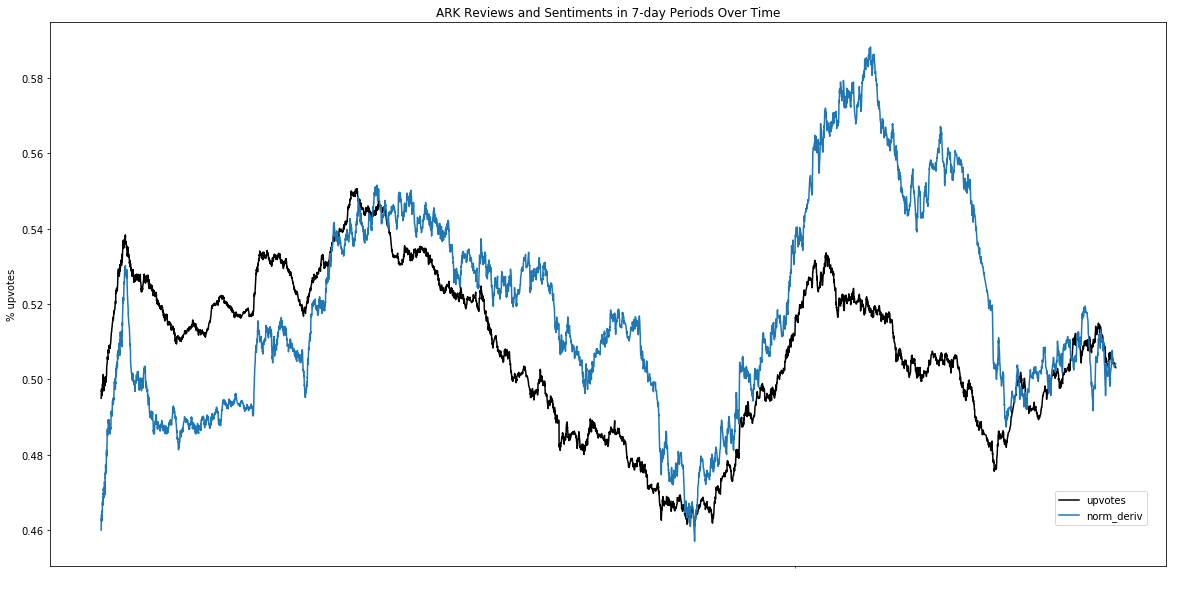

In [119]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

date = avg_sent_roc['time_of_review'].iloc[1000:10000]
percent = avg_sent_roc['upvoted_roc'].iloc[1000:10000] - 0.31

#comp_sent_raw = df['comp_sent_raw'].iloc[1000:]
#comp_sent_nostop = df['comp_sent_nostop'].iloc[1000:]
#pos_sent_nostop = df['pos_sent_nostop'].iloc[1000:]
#neg_sent_nostop = df['neg_sent_nostop'].iloc[1000:]

avg_sent_nostop = avg_sent_roc['comp_sent_nostop_window'].iloc[1000:20000]
avg_sent_raw = avg_sent_roc['comp_sent_raw_window'].iloc[1000:20000]
norm_deriv = avg_sent_roc['comp_sent_raw_window_roc'].iloc[1000:10000]


#total_sent = pos_sent_nostop - neg_sent_nostop - comp_sent_nostop

#ax = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))

#ax.plot(date, percent, 'k', date, avg_sent_nostop, 'b', date, avg_sent_raw, 'g')
ax.plot(date, percent, 'k', date, norm_deriv)


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)


fig.legend(['upvotes', 'norm_deriv'], loc='upper right', bbox_to_anchor=(0.8, 0.15))
plt.ylabel('% upvotes')
plt.title('ARK Reviews and Sentiments in 7-day Periods Over Time')

plt.show()

In [62]:
fig.savefig('plots/ARK_7day_rev_sent_corr.png')

In [120]:
b

4.7841000000000005

In [50]:
data = pd.DataFrame([])

a = np.diff(df['time_of_review_unix'], n=100)
b = np.diff(df['percent_upvotes'], n=100)*10000

data['z_p'] = b/a
#data['y_p'] = np.diff(df['percent_upvotes'],n=100) / np.diff(df['time_of_review_unix'],n=100)
#data['x_p'] = np.diff(df['time_of_review_unix'],n=100)
data['x_p'] = (np.array(df['time_of_review_unix'])[:-100] + np.array(df['time_of_review_unix'])[100:]) / 2

#data['y_p'] = data['y_p']/data['y_p'].max()

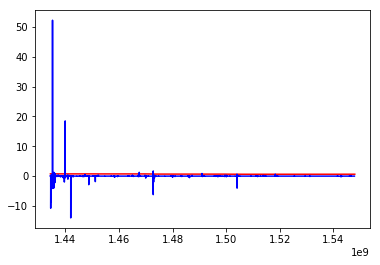

In [52]:
plt.figure(2)
plt.plot(df['time_of_review_unix'].iloc[5000:], df['percent_upvotes'].iloc[5000:], 'r')
plt.plot(data['x_p'][5000:], data['z_p'][5000:], 'b')

plt.show()

In [42]:
a = np.diff(df['time_of_review_unix'])
b = np.diff(df['percent_upvotes'])*10000

In [43]:
b[0:10]

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        , -1250.        ,   138.88888889,
        -888.88888889,  -727.27272727])